### Contexto

Dados fictícios de um app de celular. <br>
Os dados são relacionados ao setor de suporte do app e algumas métricas de *performance* geral.

### Dados

In [363]:
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
novos_usuarios = [100, 80, 110, 140, 150, 160, 170, 120, 110, 150, 200, 140]
usuarios_ativos_diarios = [1000, 750, 900, 1300, 1400, 1500, 1200, 1200, 1500, 1900, 2000, 1800]
tickets_suporte_abertos = [110, 75, 100, 140, 170, 160, 100, 130, 190, 200, 210, 140]
tickets_suporte_fechados = [100, 85, 100, 120, 130, 150, 140, 110, 130, 120, 150, 200]
receita_mensal = [10000, 8500, 9800, 10000, 11000, 12000, 10000, 10500, 13000, 13000, 20000, 17000]


### Imports

#### Imports básicos

In [316]:
import matplotlib.pyplot as plt
from cycler import cycler

#### Imports secundários

In [317]:
from matplotlib.ticker import MultipleLocator
import numpy as np

### Final

#### Gráfico principal

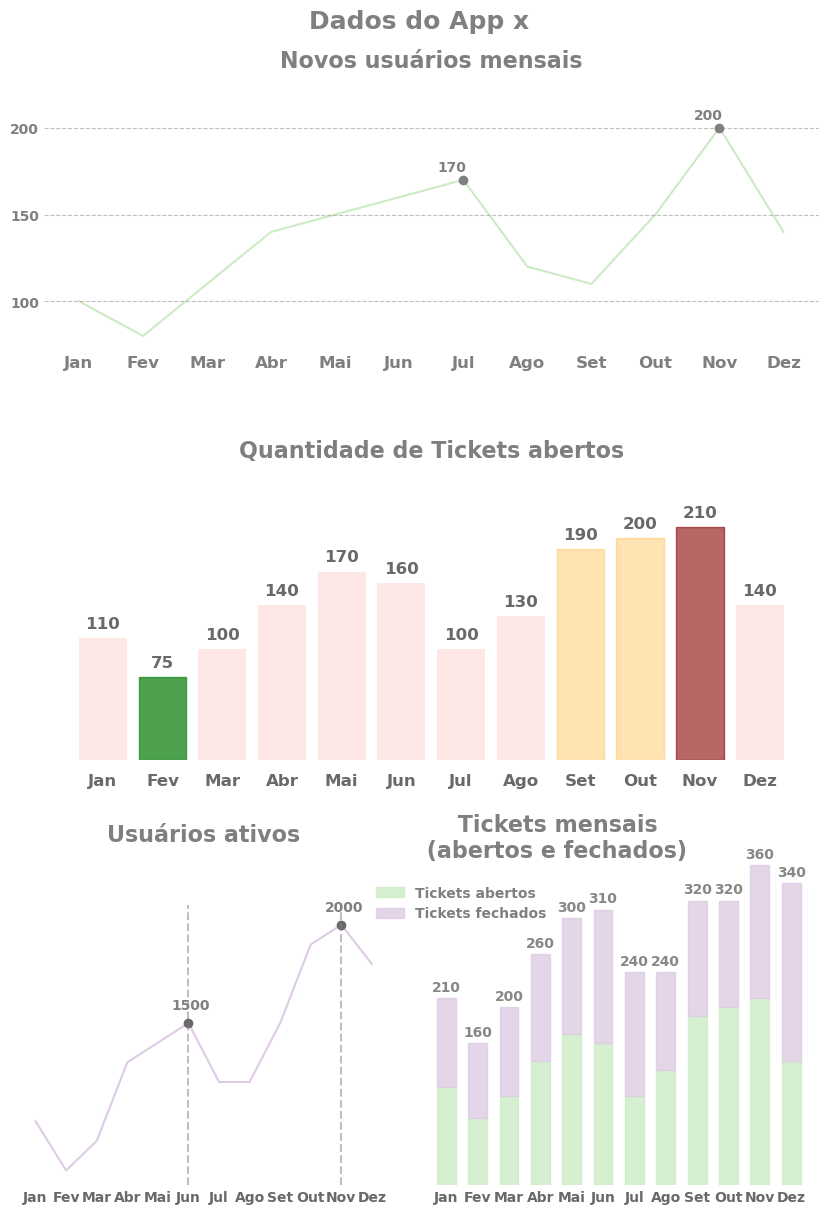

In [318]:
  ############################################################## Figura ###############################################################


### Parâmetros do mosaico (figura geral)

mosaico='AA;BB;CD' # Cria os quadros de cada gráfico do mosaico
espacamento = {'hspace': 0.6, 'wspace': 0.4} # define o espacamento vertical e horizoltal entre os quadros

### Paleta de cores

cores = plt.get_cmap('Pastel1').colors  # Cria uma variável que armazena a paleta de cores baseada na "Pastel1"
paleta_cores = cycler('color', cores) # Cria uma paleta de cores ciclica para ser usada como referência em tempo de execução.
plt.rc('axes', prop_cycle=paleta_cores)

### Parâmetros que são usados em cada gráfico do mosaico.

## Todos são personalizáveis, porém como o código se repete, é pertinente agrupalos aqui no início da construção.
# Por exemplo, por escolha estética, os gráficos não apresentarão bordas e marcações no eixo y (exceto o primeiro).

# Criação do mosaico em si
fig, axs = plt.subplot_mosaic(figsize=(10, 14),
                              mosaic=mosaico,
                              gridspec_kw=espacamento) 

# Criação do Título do mosaico
fig.suptitle("Dados do App x", y=0.94,
             color='Grey', fontsize= 18, fontweight='bold') 

# Nesse trecho foram retirados as "caixas" ao redor de cada gráfico (efeito sem bordas) e marcações do eixo 'y'.
for i, m in enumerate(['A', 'B', 'C', 'D']):
    
    axs[m].set_frame_on(False)
    axs[m].set_yticks([])

# Nesse trecho foram definidos os títulos de cada gráfico e suas posições:
titulos = [('Novos usuários mensais', 1.07),
            ('Quantidade de Tickets abertos', 1.15),
            ('Usuários ativos', 1.2),
            ('     Tickets mensais\n (abertos e fechados)', 0.95)]

for i, par in enumerate(titulos):

    graficos = ['A', 'B', 'C', 'D']

    if par != titulos[3]:
        axs[graficos[i]].set_title(par[0], y=par[1],
                    fontsize=16, weight='bold', alpha=0.5)
     # Como se pode ver, foi optado para que o título do últomo gráfico recebesse um tratamento diferenciado.
     # Essa adptação no código foi se justifica pelo apelo estético.
    else:  
        axs[graficos[i]].set_title(par[0], y=par[1],
                    fontsize=16, weight='bold', alpha=0.5,
                    loc='left')

############################################################## Gráficos ###############################################################

### Gráfico de Linhas 1 ---------------------------------------------------------------------------------------------------------------

# Criação do gráfico
axs['A'].plot(meses, novos_usuarios, 
              color=cores[2], zorder=1)

# Eixo x:

axs['A'].set_xticks(ticks=meses)
axs['A'].set_xticklabels(labels=meses, fontsize=12,
                         weight='bold', alpha=0.5)
axs['A'].tick_params(axis='x', size=0)

# Eixo y:

axs['A'].set_yticks(ticks=novos_usuarios)
axs['A'].tick_params(axis='y', size=0)
axs['A'].set_yticklabels(labels=novos_usuarios, weight='bold', alpha=0.5) # Muda a ordem do eixo!
axs['A'].set_yscale('linear') # Conserta a ordem dos eixos
axs['A'].yaxis.set_major_locator(locator=MultipleLocator(50)) # 'locator' deve ser uma instância do "matplotlib.ticker.Locator"
axs['A'].grid(visible=True, 
              axis='y',linestyle='--',
              color='gray', alpha=0.5)


# Destacando os dois picos do gráfico 1:
indices_organizados = np.argsort(novos_usuarios)[-2:] # ordena os maiores e seleciona apenas eles.

# Cria o rótulo de dados e marcador para os dois picos
for i in indices_organizados:

    axs['A'].annotate(novos_usuarios[i], color='grey', weight='bold', 
                        xy=(meses[i], novos_usuarios[i]),
                        textcoords='offset points', xytext=(-8,6), ha='center')
    axs['A'].scatter(marker='o', color='grey', zorder=2,
                        x=meses[i], y=novos_usuarios[i])       

# Redefinição da escala de y
minimo = min(novos_usuarios)*0.9
maximo = max(novos_usuarios)*1.1
axs['A'].set_ylim(ymin=minimo, ymax=maximo)


### Gráfico de Barras Verticais -------------------------------------------------------------------------------------------------------

# Criação do gráfico
barras = axs['B'].bar(meses, tickets_suporte_abertos)

# Rótulo das barras
axs['B'].bar_label(container=barras, 
                   weight='bold', color='dimgrey',fontsize=12,
                   padding=5)

# Parâmetros dos eixos
axs['B'].tick_params(axis='both', size=0)
axs['B'].set_xticks(meses)
axs['B'].set_xticklabels(meses, y=-0.03,
                         fontdict={'weight': 'bold', 
                                   'color': 'dimgrey',
                                   'size':12})

# Criação das barras destacadas:

# Destaque para o mês com maior atendimento
# Evidência para o período de crescimento na atendimento
# Atenção para o mês com menor atendimento

for i, t in enumerate(tickets_suporte_abertos):

    # Ordenação dos valores:
    tickets_organizados = np.sort(tickets_suporte_abertos)[-3:]

    if t == max(tickets_suporte_abertos):
        barras[i].set_color('darkred')
        barras[i].set_alpha(0.6)

    elif t in tickets_organizados:
        barras[i].set_color('orange')
        barras[i].set_alpha(0.3)

    elif t == min(tickets_suporte_abertos):
        barras[i].set_color('forestgreen')
        barras[i].set_alpha(0.8)

    else:
        barras[i].set_alpha(0.3)

# Redefinição do limite do eixo y:
maximo = max(tickets_suporte_abertos)*1.1
axs['B'].set_ylim(ymin=0, ymax=maximo)

### Gráfico de Linhas 2 ---------------------------------------------------------------------------------------------------------------

# Criação do gráfico
axs['C'].plot(meses, usuarios_ativos_diarios, 
              color=cores[3], zorder=1)

# Criação das marcações nos meses de maior volume de usuários ativos:
for i, valor in enumerate(usuarios_ativos_diarios):

    if (valor > usuarios_ativos_diarios[i-1]) and (valor > usuarios_ativos_diarios[i+1]):
        axs['C'].scatter(x=meses[i], y=usuarios_ativos_diarios[i],
                         marker='o', color='dimgrey', zorder=2)
        axs['C'].annotate(text=usuarios_ativos_diarios[i], 
                          color='grey', weight='bold',
                          xy=(meses[i], usuarios_ativos_diarios[i]),
                          xytext=(-12, 10), textcoords='offset points')
        axs['C'].axvline(x=i, color='gray', linestyle='--', alpha=0.5, 
                         zorder=2)

# Estética dos eixos:    
axs['C'].tick_params('both', size=0)
axs['C'].set_xticks(meses)
axs['C'].set_xticklabels(meses,
                         fontdict={'weight': 'bold', 
                                   'color': 'dimgrey',
                                   'size':10})

# Definição dos limites do gráfico:
minimo = min(usuarios_ativos_diarios)*0.9
maximo = max(usuarios_ativos_diarios)*1.05
axs['C'].set_ylim(ymin=minimo, ymax=maximo)

# Ajuste da posição do gráfico na figura (apelo estético)
axs['C'].set_position([0.1, 0.1, 
                       0.37, 0.2])


### Gráfico de Barras Verticais Empilhadas--------------------------------------------------------------------------------------------

# Criação do gráfico
barras_inf = axs['D'].bar(meses, tickets_suporte_abertos, label='Tickets abertos', width=0.6)
barras_sup = axs['D'].bar(meses, tickets_suporte_fechados, bottom=tickets_suporte_abertos, 
             label='Tickets fechados', width=0.6)

# Seleção das cores para cada barra baseado na paleta definida:
for barra, color in zip([barras_sup, barras_inf], 
                        [cores[3], cores[2]]):
    for bar in barra:
        bar.set_color(color)
        bar.set_alpha(0.8)
    
# Rótulo das barras:    
soma = [sup.get_height() + inf.get_height() for sup, inf in zip(barras_inf, barras_sup)] # Cada valor é a soma das duas barras
axs['D'].bar_label(container=barras_sup, 
                   weight='bold',color='dimgrey', alpha=0.8,
                   labels=[height for height in soma],
                   padding=3)

# Estética dos rótulos
axs['D'].set_xticks(meses)
axs['D'].set_xticklabels(meses, fontdict={'weight': 'bold',
                                          'color': "dimgrey",
                                          'size': 10})

# Eixo x sem marcador:
axs['D'].tick_params(axis='x', size=0)

# Parâmetros da legenda do gráfico
legenda = axs['D'].legend(bbox_to_anchor=(0.35, 0.75),
                frameon=False,
                prop={'weight': 'bold'})
for legend in legenda.get_texts():
    legend.set_alpha(0.5)

axs['D'].set_position([0.5, 0.1, 
                       0.4, 0.24])

# Exibição da figura completa:
plt.show()

#### Gráficos secundários

##### Performance do antedimento

In [319]:
Total_tickets = [ticket_a + tickt_f for ticket_a, tickt_f in zip(tickets_suporte_abertos, tickets_suporte_fechados)]
per_atendios = [round(aten/total, 2)*100 for aten, total in zip(tickets_suporte_fechados, Total_tickets)]

In [320]:
# Cálculos
media_atendios_espera = np.mean(tickets_suporte_fechados)
media_per_atendidos = np.mean(per_atendios)

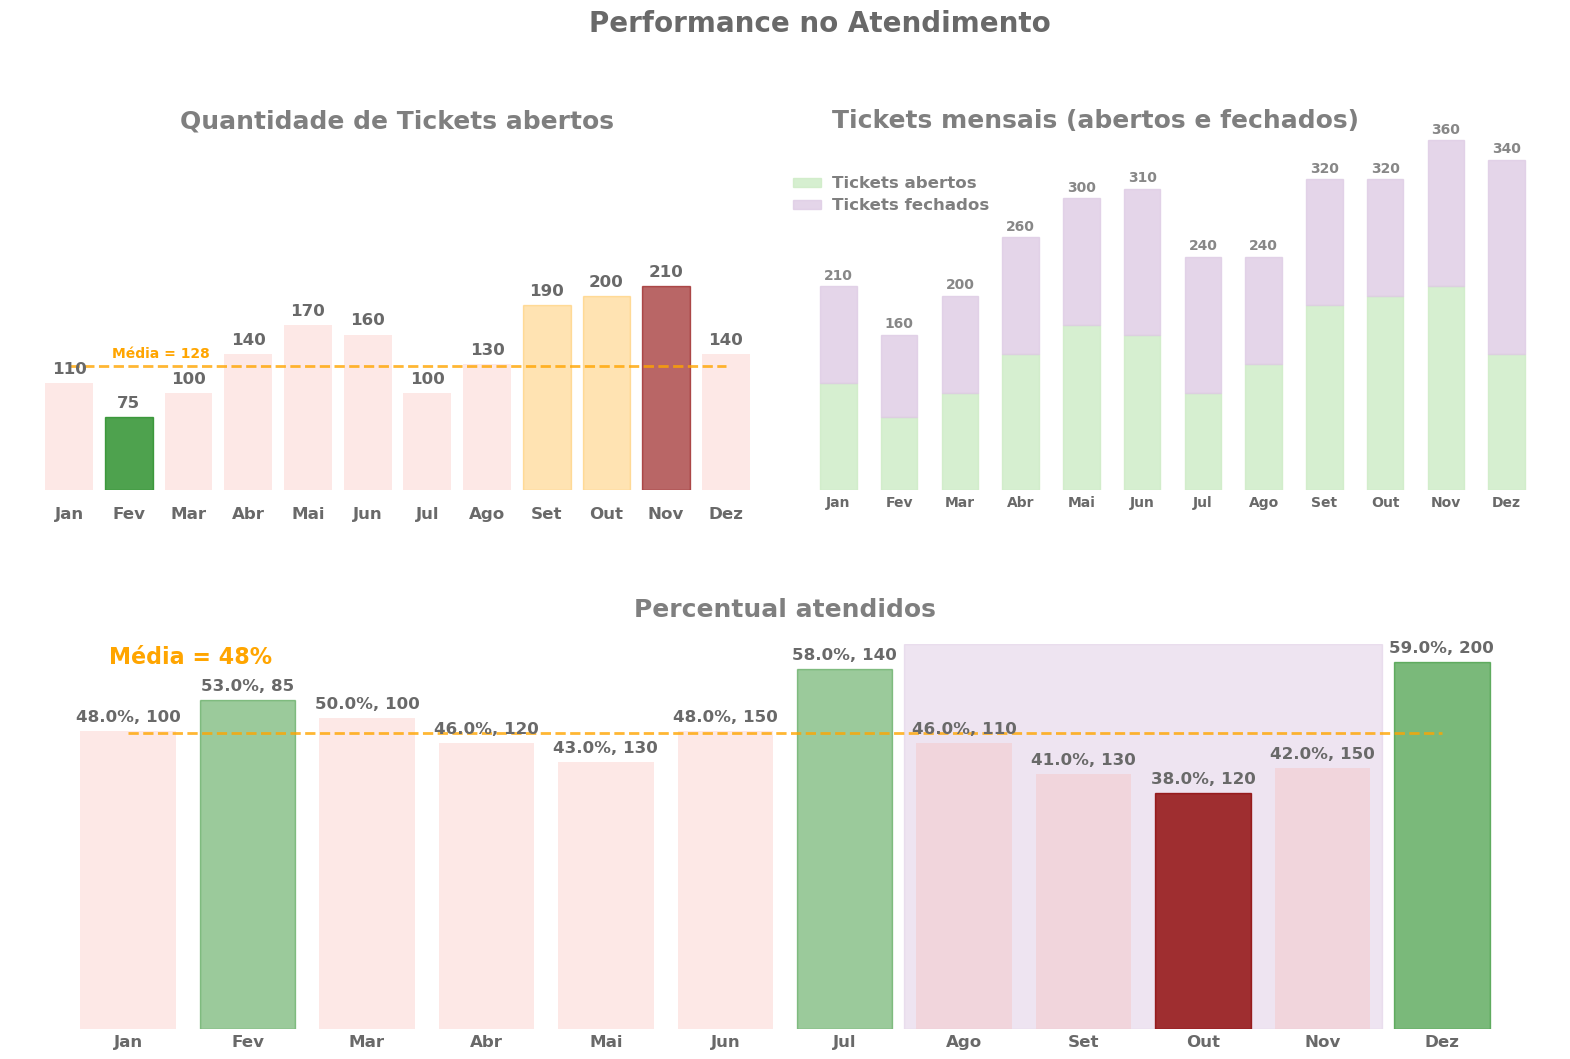

In [321]:
  ############################################################## Figura ###############################################################


### Parâmetros do mosaico (figura geral)

mosaico='BD;EE' # Cria os quadros de cada gráfico do mosaico
espacamento = {'hspace': 0.4, 'wspace': 0} # define o espacamento vertical e horizoltal entre os quadros

### Paleta de cores

cores = plt.get_cmap('Pastel1').colors  # Cria uma variável que armazena a paleta de cores baseada na "Pastel1"
paleta_cores = cycler('color', cores) # Cria uma paleta de cores ciclica para ser usada como referência em tempo de execução.
plt.rc('axes', prop_cycle=paleta_cores)

### Parâmetros que são usados em cada gráfico do mosaico.

## Todos são personalizáveis, porém como o código se repete, é pertinente agrupalos aqui no início da construção.
# Por exemplo, por escolha estética, os gráficos não apresentarão bordas e marcações no eixo y (exceto o primeiro).

# Criação do mosaico em si
fig, axs = plt.subplot_mosaic(figsize=(20, 12),
                              mosaic=mosaico,
                              gridspec_kw=espacamento) 

# Criação do Título do mosaico
fig.suptitle("Performance no Atendimento", y=0.96, x= 0.53,
             color='DimGrey', fontsize= 20, fontweight='bold') 

# Nesse trecho foram retirados as "caixas" ao redor de cada gráfico (efeito sem bordas) e marcações do eixo 'y'.
for i, m in enumerate(['B', 'D', 'E']):
    
    axs[m].set_frame_on(False)
    axs[m].set_yticks([])

# Nesse trecho foram definidos os títulos de cada gráfico, suas posições e limites idênticos:
titulos = [('Quantidade de Tickets abertos', 0.92, 0.5),
            ('Tickets mensais (abertos e fechados)',  0.92, 0.4),
            ("Percentual atendidos", 1.05, 0.5)]
graficos = ['B','D', 'E']
maximo = max(Total_tickets)*1.1

for i, par in enumerate(titulos):

    axs[graficos[i]].set_title(par[0], y=par[1], x=par[2],
            fontsize=18, weight='bold', alpha=0.5)
    
    
    if graficos[i] != 'E':
        axs[graficos[i]].set_ylim(ymin=0, ymax=maximo)



############################################################## Gráficos ###############################################################

### Gráfico de Barras Verticais 1 -----------------------------------------------------------------------------------------------------

# Criação do gráfico
barras = axs['B'].bar(meses, tickets_suporte_abertos)

# Rótulo das barras
axs['B'].bar_label(container=barras, 
                   weight='bold', color='dimgrey',fontsize=12,
                   padding=5)


# Linha média
axs['B'].plot([meses.index('Jan'), meses.index('Dez')], [media_atendios_espera, media_atendios_espera], 
              color='orange', alpha=0.8, linestyle='--', linewidth=2, zorder=1)
axs['B'].annotate(text=f'Média = {media_atendios_espera:.0f}', 
                          color='orange', weight='bold',
                          xy=(meses.index('Fev'), 0.8),
                          xytext=(-12, 95), textcoords='offset points')

# Parâmetros dos eixos
axs['B'].tick_params(axis='both', size=0)
axs['B'].set_xticks(meses)
axs['B'].set_xticklabels(meses, y=-0.03,
                         fontdict={'weight': 'bold', 
                                   'color': 'dimgrey',
                                   'size':12})

# Criação das barras destacadas:

# Destaque para o mês com maior atendimento
# Evidência para o período de crescimento na atendimento
# Atenção para o mês com menor atendimento

for i, t in enumerate(tickets_suporte_abertos):

    # Ordenação dos valores:
    tickets_organizados = np.sort(tickets_suporte_abertos)[-3:]

    if t == max(tickets_suporte_abertos):
        barras[i].set_color('darkred')
        barras[i].set_alpha(0.6)

    elif t in tickets_organizados:
        barras[i].set_color('orange')
        barras[i].set_alpha(0.3)

    elif t == min(tickets_suporte_abertos):
        barras[i].set_color('forestgreen')
        barras[i].set_alpha(0.8)

    else:
        barras[i].set_alpha(0.3)


### Gráfico de Barras Verticais Empilhadas--------------------------------------------------------------------------------------------

# Criação do gráfico
barras_inf = axs['D'].bar(meses, tickets_suporte_abertos, label='Tickets abertos', width=0.6)
barras_sup = axs['D'].bar(meses, tickets_suporte_fechados, bottom=tickets_suporte_abertos, 
             label='Tickets fechados', width=0.6)

# Seleção das cores para cada barra baseado na paleta definida:
for barra, color in zip([barras_sup, barras_inf], 
                        [cores[3], cores[2]]):
    for bar in barra:
        bar.set_color(color)
        bar.set_alpha(0.8)
    
# Rótulo das barras:    
soma = [sup.get_height() + inf.get_height() for sup, inf in zip(barras_inf, barras_sup)] # Cada valor é a soma das duas barras
axs['D'].bar_label(container=barras_sup, 
                   weight='bold',color='dimgrey', alpha=0.8,
                   labels=[height for height in soma],
                   padding=3)

# Estética dos rótulos
axs['D'].set_xticks(meses)
axs['D'].set_xticklabels(meses, fontdict={'weight': 'bold',
                                          'color': "dimgrey",
                                          'size': 10})

# Eixo x sem marcador:
axs['D'].tick_params(axis='x', size=0)


# Parâmetros da legenda do gráfico
legenda = axs['D'].legend(bbox_to_anchor=(0.28, 0.85),
                frameon=False,
                prop={'weight': 'bold'})
for legend in legenda.get_texts():
    legend.set_alpha(0.5)
    legend.set_size(12)


### Gráfico de Barras Verticais 2 -----------------------------------------------------------------------------------------------------

# Criação do gráfico
barras = axs['E'].bar(meses, per_atendios)

# Rótulo das barras
axs['E'].bar_label(container=barras, 
                   labels=[f'{percentual.get_height():.1f}%, {t_fcd}' for percentual, t_fcd in zip(barras, tickets_suporte_fechados)],
                   weight='bold', color='dimgrey',fontsize=12,
                   padding=5)

# Seleção das cores para cada barra baseado na paleta definida:
for i, t in enumerate(per_atendios):

    # Ordenação dos valores:
    tickets_organizados = np.sort(per_atendios)[-3:]

    if t == max(per_atendios):
       color, alpha = 'forestgreen', 0.6
    elif t in tickets_organizados:
        color, alpha = 'forestgreen', 0.45
    elif t == min(per_atendios):
        color, alpha = 'darkred', 0.8
    else:
        color, alpha = None, 0.3

    if color: 
        barras[i].set_color(color)

    barras[i].set_alpha(alpha)


axs['E'].axvspan(xmin=6.5, xmax=10.5, color=cores[3], alpha=0.5, 
            zorder=0)

# Eixo x:
axs['E'].tick_params(axis='x', size=0)
axs['E'].tick_params(axis='both', size=0)
axs['E'].set_xticks(meses)
axs['E'].set_xticklabels(meses,
                         fontdict={'weight': 'bold', 
                                   'color': 'dimgrey',
                                   'size':12})



# Linha média
axs['E'].plot([meses.index('Jan'), meses.index('Dez')], [media_per_atendidos, media_per_atendidos], 
             color='orange', alpha=0.8, linestyle='--', linewidth=2, zorder=1)
axs['E'].annotate(text=f'Média = {media_per_atendidos:.0f}%', size=16,
                          color='orange', weight='bold',
                          xy=(meses.index('Fev'), 0.8),
                          xytext=(-100, 260), textcoords='offset points')


# Exibição da figura completa:
plt.show()

Podemos ver que os meses de Agosto a Novembro ocorreu um aumento na quantidade de “tickets abertos” isso gerou uma perda em *performance*. Esses meses apresentaram uma queda no desempenho, inclusive para níveis abaixo da média.<br>

Assim, o resultado da equipe de suporte, ao contrário das expectativas, demonstrou uma piora quando exposto a uma demanda maior de trabalho.<br>
<br>

A demanda ideal de trabalho ideal é, portanto, algo ao redor de **128 chamados** por mês e que um aumento no volume de chamados pode impactar negativamente na *performance* da equipe.

##### Movimetação de usuários

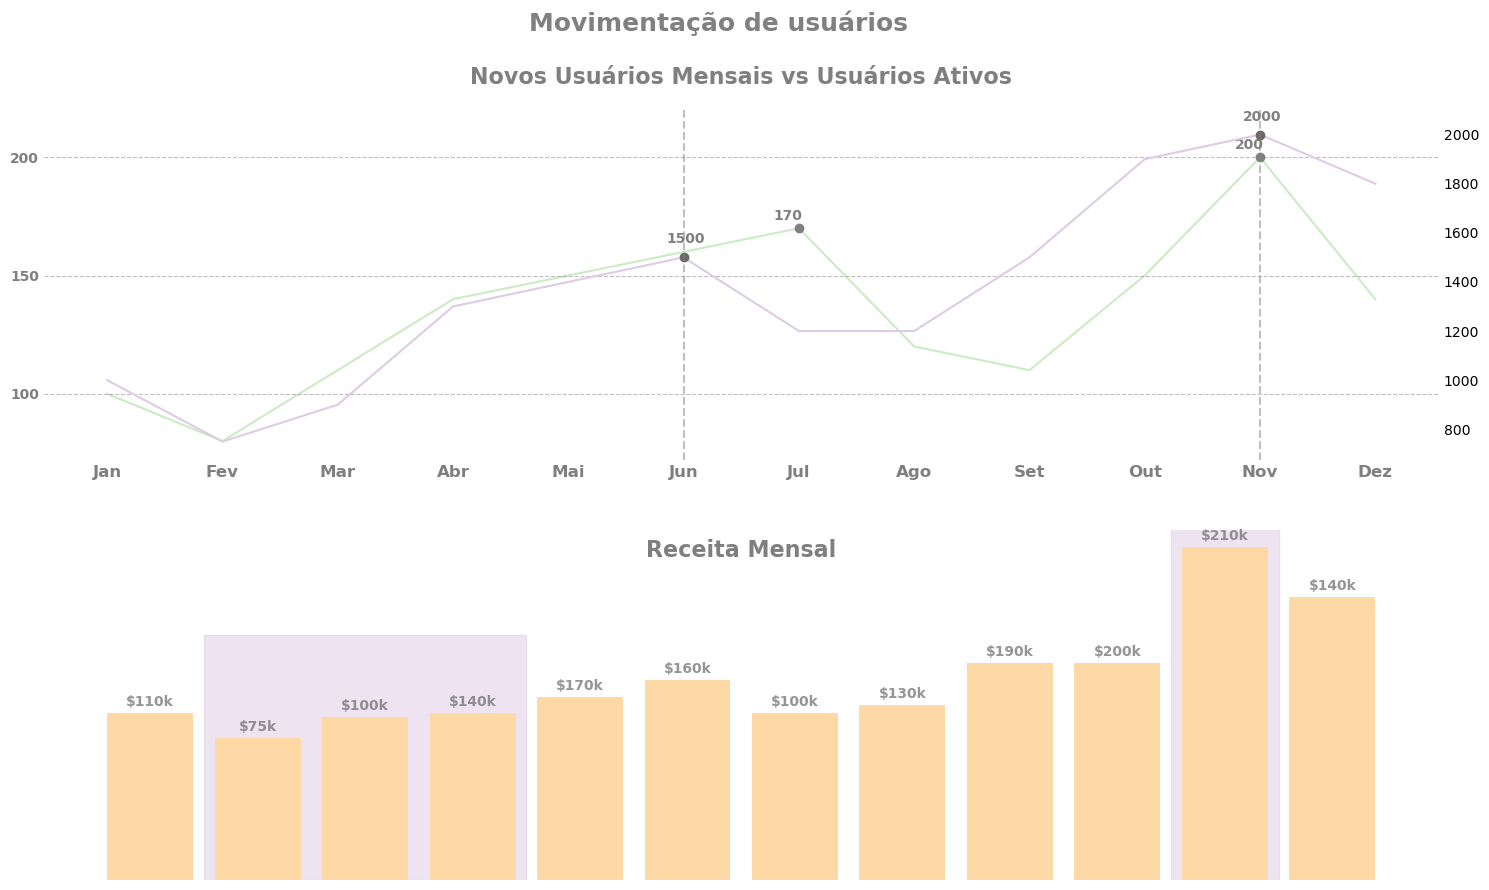

In [362]:
  ############################################################## Figura ###############################################################


### Parâmetros do mosaico (figura geral)

mosaico='A;F' # Cria os quadros de cada gráfico do mosaico
espacamento = {'hspace': 0.2} # define o espacamento vertical e horizoltal entre os quadros

### Paleta de cores

cores = plt.get_cmap('Pastel1').colors  # Cria uma variável que armazena a paleta de cores baseada na "Pastel1"
paleta_cores = cycler('color', cores) # Cria uma paleta de cores ciclica para ser usada como referência em tempo de execução.
plt.rc('axes', prop_cycle=paleta_cores)

### Parâmetros que são usados em cada gráfico do mosaico.

## Todos são personalizáveis, porém como o código se repete, é pertinente agrupalos aqui no início da construção.
# Por exemplo, por escolha estética, os gráficos não apresentarão bordas e marcações no eixo y (exceto o primeiro).

# Criação do mosaico em si
fig, axs = plt.subplot_mosaic(figsize=(18, 10),
                              mosaic=mosaico,
                              gridspec_kw=espacamento) 

# Criação do Título do mosaico
fig.suptitle("Movimentação de usuários", y=0.98,
             color='Grey', fontsize= 18, fontweight='bold') 

# Nesse trecho foram retirados as "caixas" ao redor de cada gráfico (efeito sem bordas) e marcações do eixo 'y'.
for i, m in enumerate(['A','F']):

    axs[m].set_frame_on(False)
    axs[m].set_yticks([])


# Nesse trecho foram definidos os títulos de cada gráfico e suas posições:
titulos = [('Novos Usuários Mensais vs Usuários Ativos', 1.05),
            ('Receita Mensal', 0.9)]

graficos = ['A', 'F']
for i, par in enumerate(titulos):

    axs[graficos[i]].set_title(par[0], y=par[1], x=0.5,
                fontsize=16, weight='bold', alpha=0.5)

############################################################## Gráficos ###############################################################

### Gráfico de Linhas 1 ---------------------------------------------------------------------------------------------------------------

# Criação do gráfico
axs['A'].plot(meses, novos_usuarios, 
              color=cores[2], zorder=1)

# Eixo x:

axs['A'].set_xticks(ticks=meses)
axs['A'].set_xticklabels(labels=meses, fontsize=12,
                         weight='bold', alpha=0.5)
axs['A'].tick_params(axis='x', size=0)

# Eixo y:

axs['A'].set_yticks(ticks=novos_usuarios)
axs['A'].tick_params(axis='y', size=0)
axs['A'].set_yticklabels(labels=novos_usuarios, weight='bold', alpha=0.5) # Muda a ordem do eixo!
axs['A'].set_yscale('linear') # Conserta a ordem dos eixos
axs['A'].yaxis.set_major_locator(locator=MultipleLocator(50)) # 'locator' deve ser uma instância do "matplotlib.ticker.Locator"
axs['A'].grid(visible=True, 
              axis='y',linestyle='--',
              color='gray', alpha=0.5)


# Destacando os dois picos do gráfico 1:
indices_organizados = np.argsort(novos_usuarios)[-2:] # ordena os maiores e seleciona apenas eles.

# Cria o rótulo de dados e marcador para os dois picos
for i in indices_organizados:

    axs['A'].annotate(novos_usuarios[i], color='grey', weight='bold', 
                        xy=(meses[i], novos_usuarios[i]),
                        textcoords='offset points', xytext=(-8,6), ha='center')
    axs['A'].scatter(marker='o', color='grey', zorder=2,
                        x=meses[i], y=novos_usuarios[i])       

# Redefinição da escala de y
minimo = min(novos_usuarios)*0.9
maximo = max(novos_usuarios)*1.1
axs['A'].set_ylim(ymin=minimo, ymax=maximo)


### Gráfico de Linhas 2 ---------------------------------------------------------------------------------------------------------------
axs_C = axs['A'].twinx()
axs_C.set_frame_on(False)

# Criação do gráfico
axs_C.plot(meses, usuarios_ativos_diarios, 
              color=cores[3], zorder=1)

# Criação das marcações nos meses de maior volume de usuários ativos:
for i, valor in enumerate(usuarios_ativos_diarios):

    if (valor > usuarios_ativos_diarios[i-1]) and (valor > usuarios_ativos_diarios[i+1]):
        axs_C.scatter(x=meses[i], y=usuarios_ativos_diarios[i],
                         marker='o', color='dimgrey', zorder=2)
        axs_C.annotate(text=usuarios_ativos_diarios[i], 
                          color='grey', weight='bold',
                          xy=(meses[i], usuarios_ativos_diarios[i]),
                          xytext=(-12, 10), textcoords='offset points')
        axs_C.axvline(x=i, color='gray', linestyle='--', alpha=0.5, 
                         zorder=2)

# Estética dos eixos:    
axs_C.tick_params('both', size=0)
axs_C.set_xticks(ticks=meses)
axs_C.set_xticklabels(meses, fontdict={'size':0})

# Definição dos limites do gráfico:
minimo = min(usuarios_ativos_diarios)*0.9
maximo = max(usuarios_ativos_diarios)*1.05
axs_C.set_ylim(ymin=minimo, ymax=maximo)


### Gráfico de Barras 1 ---------------------------------------------------------------------------------------------------------------

barras = axs['F'].bar(meses, receita_mensal, color=cores[4])

axs['F'].bar_label(container=barras,
                   weight='bold',color='dimgrey', alpha=0.7,
                   labels=[f'${valor.get_height()}k' for valor in barra],
                   padding=3)

axs['F'].axvspan(xmin=0.5, xmax=3.5, ymax=0.7, color=cores[3], alpha=0.5, zorder=0)
axs['F'].axvspan(xmin=9.5, xmax=10.5, ymax=1.15, color=cores[3], alpha=0.5, zorder=0)


# Eixo x:
axs['F'].set_xticks([])


# Exibição da figura completa:
plt.show()

Podemos notar uma suave correlaçãpo entre as variações na receita e o crescimento mensal e número de usuários ativos.